In [1]:
# Theft Label Creation Using Domain Logic

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv(r"C:\Users\BVAYA\Desktop\energy-theft-prediction\data\processed\energy_featured.csv",
                 parse_dates=['DateTime'],
                 index_col='DateTime')

In [6]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,Day,Month,Weekday,is_weekend,Rolling_mean_power,Rolling_std_power,Is_peak_hour,Power_voltage_ratio,Reactive_active_ratio
DateTime,,,,,,,,,,,,,,,,,
2006-12-16 18:23:00,2.926,0.0,235.68,12.4,0.0,1.0,17.0,18,16,12,5,1,4.103600,1.243131,1,0.012415,0.0
2006-12-16 18:24:00,3.452,0.0,235.20,15.2,0.0,1.0,17.0,18,16,12,5,1,4.090867,1.245870,1,0.014677,0.0
2006-12-16 18:25:00,4.870,0.0,233.74,20.8,0.0,1.0,17.0,18,16,12,5,1,4.082700,1.238996,1,0.020835,0.0
2006-12-16 18:26:00,4.868,0.0,233.84,20.8,0.0,1.0,17.0,18,16,12,5,1,4.074267,1.231759,1,0.020818,0.0
2006-12-16 18:27:00,4.866,0.0,233.79,20.8,0.0,1.0,17.0,18,16,12,5,1,4.065567,1.224143,1,0.020814,0.0


In [9]:
### Theft Label Definition

# Electricity theft is not directly observable in the dataset.
# Therefore, theft labels are created using domain-driven heuristics
# based on abnormal consumption behavior.

# A data point is labeled as suspicious if it shows:
# - Sudden abnormal spikes in consumption
# - High usage during non-peak or night hours
# - Unusual power–voltage relationships
# - Excessive reactive power compared to active power

In [11]:
Power_threshold = data['Global_active_power'].quantile(0.99) # here quantile is to return top 1% of value above this
Ratio_threshold = data['Reactive_active_ratio'].quantile(0.99)

In [12]:
data['theft_label']=0

In [14]:
data.loc[
    (data['Global_active_power'] > Power_threshold) &
    (data['Is_peak_hour'] == 0) &
    (data['Reactive_active_ratio'] > Ratio_threshold),
    'theft_label'
] = 1

In [15]:
data['theft_label'].value_counts()

theft_label
0    2049221
Name: count, dtype: int64

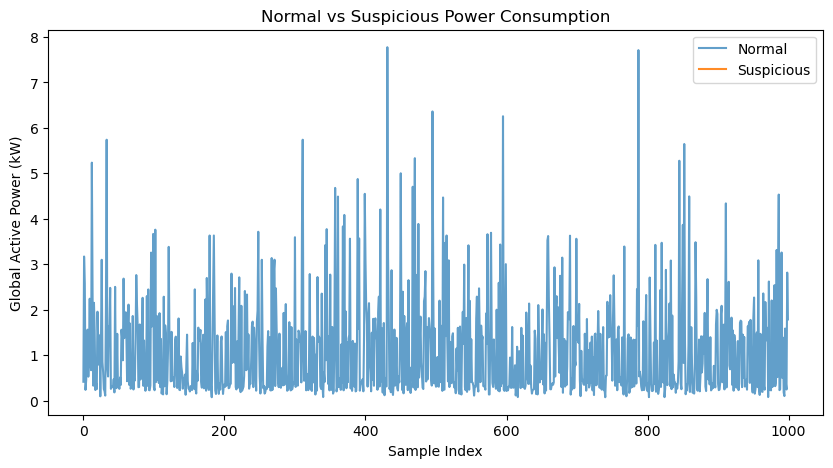

In [17]:
import matplotlib.pyplot as plt


normal_sample = data[data['theft_label'] == 0]['Global_active_power'].sample(
    1000, random_state=42
)


theft_count = data[data['theft_label'] == 1].shape[0]
theft_sample_size = min(200, theft_count)

theft_sample = data[data['theft_label'] == 1]['Global_active_power'].sample(
    theft_sample_size, random_state=42
)

# Plot
plt.figure(figsize=(10,5))
plt.plot(normal_sample.values, label='Normal', alpha=0.7)
plt.plot(theft_sample.values, label='Suspicious', alpha=0.9)
plt.legend()
plt.title('Normal vs Suspicious Power Consumption')
plt.xlabel('Sample Index')
plt.ylabel('Global Active Power (kW)')
plt.show()


In [19]:
features = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Rolling_mean_power',
    'Rolling_std_power',
    'Power_voltage_ratio',
    'Reactive_active_ratio',
    'Is_peak_hour',
    'is_weekend'
]

X = data[features]
y = data['theft_label']

In [23]:
data.to_csv(r'C:\Users\BVAYA\Desktop\energy-theft-prediction\data\processed\energy_labeled.csv')